In [398]:
import pandas as pd
import collections
import digitalhub as dh
from datasets_tourism_dh import *

In [399]:
START_DATE = "2023-07-01"
END_DATE = "2023-09-30"

LOC_ID_COMUNE_MOLVENO = "27"
LOC_TYPE_COMUNE_MOLVENO = "TN_MKT_AL_3"

In [400]:
attendences_df = vodafone_attendences_df[
    (vodafone_attendences_df['date'] >= START_DATE) &
    (vodafone_attendences_df['date'] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_df["userProfile"] != 'COMMUTER') &
    (vodafone_attendences_df["locId"] == LOC_ID_COMUNE_MOLVENO) &
    (vodafone_attendences_df["locType"] == LOC_TYPE_COMUNE_MOLVENO) ]
attendences_df = attendences_df[['date','userProfile','value']]
attendences_df

,date,userProfile,value
2977735,2023-07-01,TOURIST,18
2977736,2023-07-01,VISITOR,18
2977744,2023-07-01,TOURIST,108
2977745,2023-07-01,VISITOR,36
2977746,2023-07-01,TOURIST,216
...,...,...,...
3619685,2023-09-30,TOURIST,929
3619686,2023-09-30,VISITOR,1358
3619697,2023-09-30,TOURIST,25
3619698,2023-09-30,VISITOR,25


In [401]:
tourist_attendences_df = attendences_df[attendences_df['userProfile'] == "TOURIST"][['date','value']].groupby('date').sum()
tourist_attendences_df['weakday'] = pd.to_datetime(tourist_attendences_df.index).weekday
tourist_attendences_df

,value,weakday
date,,
2023-07-01,2924,5
2023-07-02,2987,6
2023-07-03,2544,0
2023-07-04,2547,1
2023-07-05,2762,2
...,...,...
2023-09-26,1183,1
2023-09-27,1070,2
2023-09-28,1083,3


In [402]:
excursionist_attendences_df = attendences_df[attendences_df['userProfile'] == "VISITOR"][['date','value']].groupby('date').sum()
excursionist_attendences_df['weakday'] = pd.to_datetime(excursionist_attendences_df.index).weekday
excursionist_attendences_df

,value,weakday
date,,
2023-07-01,1944,5
2023-07-02,4300,6
2023-07-03,2413,0
2023-07-04,1958,1
2023-07-05,2167,2
...,...,...
2023-09-26,763,1
2023-09-27,899,2
2023-09-28,1089,3


# Meteo 

In [403]:
FEATURE = "probprec06-12" #"meteo" #"intprec06-12" #"probprec12-18" # probprec06-12

In [404]:
ambiti = meteotrentino_bollettino_df["ambito"].unique()
comuni = meteotrentino_bollettino_df["comune"].unique()
print(f"ambiti: {ambiti}")
print(f"comuni: {comuni}")

ambiti: ['TRENTO' 'MADONNA' 'FIEMME' 'ALTIPIANO' 'VALDINON' 'DOLOMITI' 'VALSUGANA'
 'GARDA' 'ROVERETO' None 'SMARTINO' 'VALDISOLE']
comuni: ["BASELGA DI PINE'" 'CANAZEI' 'CAVALESE' 'FOLGARIA' 'FONDO' "MALE'"
 'MEZZOLOMBARDO' 'MOLVENO' 'PERGINE VALSUGANA' 'PINZOLO' 'RIVA DEL GARDA'
 'ROVERETO' "SANT'ORSOLA" 'TIONE DI TRENTO' 'TRENTO' 'COMANO TERME'
 'BEZZECCA' 'PIEVE DI BONO' 'CENTA SAN NICOLO' 'SAN MARTINO DI CASTROZZA'
 'ARCO' 'MEZZANO']


In [405]:
# Weather nearby Molveno
meteo_comune_near_molveno = meteotrentino_bollettino_df[
    ((meteotrentino_bollettino_df["comune"] == "TRENTO") |
     (meteotrentino_bollettino_df["comune"].str.contains("MEZZOLOMBARDO")) |
     (meteotrentino_bollettino_df["comune"].str.contains("PERGINE VALSUGANA"))
     ) & (meteotrentino_bollettino_df["data"] >= START_DATE) &
         (meteotrentino_bollettino_df["data"] <= END_DATE)
]

In [424]:
# Weather in Molveno
meteo_df = meteotrentino_bollettino_df[
    (meteotrentino_bollettino_df["comune"].str.contains("MOLVENO")) &
    (meteotrentino_bollettino_df["data"] >= START_DATE) &
    (meteotrentino_bollettino_df["data"] <= END_DATE)
][['data', FEATURE, "tmax"]].set_index('data')
meteo_molveno_df = meteo_df.reset_index()

## Data imputation
Fill in the missing values of weather with the values taken from comune near Molveno

In [430]:
meteo_df.describe()

,tmax
count,52.000000
mean,25.019231
std,3.775517
min,15.000000
25%,22.750000
50%,25.000000
75%,28.000000
max,32.000000


In [436]:
def mapping_temp_val(tmax):
    if tmax>=28:
        return "Caldo"
    elif tmax<=22:
        return "Freddo"
    else:
        return "Normale"

In [437]:
meteo_df["tmax_group"] = meteo_df["tmax"].map(mapping_temp_val)
meteo_df

,probprec06-12,tmax,tmax_group
data,,,
2023-07-01,media,24,Normale
2023-07-04,molto bassa,23,Normale
2023-07-06,media,23,Normale
2023-07-08,media,26,Normale
2023-07-11,molto bassa,31,Caldo
2023-07-14,molto bassa,26,Normale
2023-07-15,molto bassa,27,Normale
2023-07-16,molto bassa,27,Normale
2023-07-17,molto bassa,28,Caldo


In [438]:
meteo_df.shape

(52, 3)

In [439]:
comune_near_importance_order = ["MEZZOLOMBARDO", "PERGINE VALSUGANA", "TRENTO"]
# format the categorical data 
meteo_comune_near_molveno["comune"] = pd.Categorical(meteo_comune_near_molveno["comune"], categories = comune_near_importance_order)
meteo_comune_near_molveno = meteo_comune_near_molveno.sort_values(by = "comune")

In [440]:
missing_dates = set(meteo_comune_near_molveno["data"]) - set(meteo_df.index)
missing_dates

{'2023-07-02',
 '2023-07-03',
 '2023-08-16',
 '2023-09-07',
 '2023-09-23',
 '2023-09-26'}

In [441]:
filled_missing_dates = []
for curr_date in missing_dates:    
    rows = meteo_comune_near_molveno[meteo_comune_near_molveno["data"] == curr_date]
    rows = rows.sort_values(by = "comune")
    filled_missing_dates.append({"data": rows.iloc[0, :].to_dict()["data"],
                        "probprec06-12": rows.iloc[0, :].to_dict()["probprec06-12"]})
filled_missing_dates = pd.DataFrame(data=filled_missing_dates)
filled_missing_dates

,data,probprec06-12
0,2023-09-07,--
1,2023-09-23,molto bassa
2,2023-07-03,bassa
3,2023-08-16,molto bassa
4,2023-09-26,--
5,2023-07-02,molto bassa


In [442]:
def data_imputation_weather(nearby_weather, target_weather):
    """
    Filling in missing weather data for specific  days
    """
    missing_dates = set(nearby_weather["data"]) - set(target_weather.index)
    comune_near_importance_order = ["MEZZOLOMBARDO", "PERGINE VALSUGANA", "TRENTO"]
    # format the categorical data 
    nearby_weather["comune"] = pd.Categorical(nearby_weather["comune"], categories = comune_near_importance_order)
    nearby_weather = nearby_weather.sort_values(by = "comune")
    filled_missing_dates = []
    for curr_date in missing_dates:    
        rows = nearby_weather[nearby_weather["data"] == curr_date]
        rows = rows.sort_values(by = "comune")
        filled_missing_dates.append({"data": rows.iloc[0, :].to_dict()["data"],
                            "probprec06-12": rows.iloc[0, :].to_dict()["probprec06-12"]})
    filled_missing_dates = pd.DataFrame(data=filled_missing_dates)
    return filled_missing_dates
resulting_data = data_imputation_weather(meteo_comune_near_molveno, meteo_df)
resulting_data = resulting_data.set_index("data")

In [443]:
meteo_df2 = pd.concat([meteo_df, resulting_data], axis=0)
meteo_df2.shape

(58, 3)

In [444]:
FEATURE = "tmax_group"

In [446]:
freq = dict(collections.Counter(meteo_df[FEATURE].values))
#freq.pop('--')

size = sum(freq.values())
meteo_dist = { k: v/size for k,v in freq.items() }

meteo_dist

{'Normale': 0.4807692307692308, 'Caldo': 0.2692307692307692, 'Freddo': 0.25}

In [447]:
tourist_attendences_meteo_df = pd.merge(tourist_attendences_df, meteo_df, how='outer', left_index=True, right_index=True).fillna('--')
tourist_attendences_meteo_df

,value,weakday,probprec06-12,tmax,tmax_group
2023-07-01,2924,5,media,24.0,Normale
2023-07-02,2987,6,--,--,--
2023-07-03,2544,0,--,--,--
2023-07-04,2547,1,molto bassa,23.0,Normale
2023-07-05,2762,2,--,--,--
...,...,...,...,...,...
2023-09-26,1183,1,--,--,--
2023-09-27,1070,2,--,--,--
2023-09-28,1083,3,--,--,--
2023-09-29,1526,4,--,23.0,Normale


In [448]:
excursionist_attendences_meteo_df = pd.merge(excursionist_attendences_df, meteo_df, how='outer', left_index=True, right_index=True).fillna('--')
excursionist_attendences_meteo_df

,value,weakday,probprec06-12,tmax,tmax_group
2023-07-01,1944,5,media,24.0,Normale
2023-07-02,4300,6,--,--,--
2023-07-03,2413,0,--,--,--
2023-07-04,1958,1,molto bassa,23.0,Normale
2023-07-05,2167,2,--,--,--
...,...,...,...,...,...
2023-09-26,763,1,--,--,--
2023-09-27,899,2,--,--,--
2023-09-28,1089,3,--,--,--
2023-09-29,703,4,--,23.0,Normale


In [449]:
def compute_stats(attendences_meteo_df):
    presences_stats = {}
    
    sample = attendences_meteo_df[['value']]
    (mean, std) = (sample.mean().value, sample.std().value)
    presences_stats[-1, "*"] = {'mean':mean, 'std':std}
    
    for w in range(7):
        sample = attendences_meteo_df[attendences_meteo_df['weakday']==w][['value']]
        (mean, std) = (sample.mean().value, sample.std().value)
        presences_stats[w, "*"] = {'mean':mean, 'std':std}
        
    for p in attendences_meteo_df[FEATURE].unique():
        if p == '--': continue
        sample = attendences_meteo_df[attendences_meteo_df[FEATURE]==p][['value']]
        (mean, std) = (sample.mean().value, sample.std().value)
        presences_stats[-1, p] = {'mean':mean, 'std':std}
        
        for w in range(7):
            sample = attendences_meteo_df[(attendences_meteo_df['weakday']==w) &
                 (attendences_meteo_df[FEATURE]==p)][['value']]
            if len(sample) == 0:
                (mean, std) = ((presences_stats[w, '*']['mean'] + presences_stats[-1,p]['mean']) * 0.5,
                               (presences_stats[w, '*']['std'] * presences_stats[-1,p]['std']) ** 0.5)
            elif len(sample) == 1:
                (mean, std) =  (sample.mean().value,
                                (presences_stats[w, '*']['std'] * presences_stats[-1,p]['std']) ** 0.5)
            else:
                (mean, std) = (sample.mean().value, sample.std().value)
            presences_stats[w, p] = {'mean':mean, 'std':std}
    
    return presences_stats

In [450]:
tourist_presences_stats = compute_stats(tourist_attendences_meteo_df)
tourist_presences_stats

{(-1, '*'): {'mean': 3292.75, 'std': 1127.9532044010873},
 (0, '*'): {'mean': 3037.4615384615386, 'std': 1171.188258094076},
 (1, '*'): {'mean': 2945.230769230769, 'std': 1117.096247259396},
 (2, '*'): {'mean': 3031.4615384615386, 'std': 1151.6471258871368},
 (3, '*'): {'mean': 3136.4615384615386, 'std': 1167.2054671582473},
 (4, '*'): {'mean': 3361.230769230769, 'std': 994.882920569564},
 (5, '*'): {'mean': 3858.5, 'std': 1151.389511717172},
 (6, '*'): {'mean': 3635.3846153846152, 'std': 1051.836927986902},
 (-1, 'Normale'): {'mean': 3333.2, 'std': 1071.7029283652569},
 (0, 'Normale'): {'mean': 2160.6666666666665, 'std': 1276.098089228776},
 (1, 'Normale'): {'mean': 2922.5, 'std': 531.0371926710972},
 (2, 'Normale'): {'mean': 2913.5, 'std': 770.0392847121502},
 (3, 'Normale'): {'mean': 3196.0, 'std': 441.23463146040564},
 (4, 'Normale'): {'mean': 3113.5, 'std': 1250.3531501139987},
 (5, 'Normale'): {'mean': 3841.3333333333335, 'std': 1071.537913468301},
 (6, 'Normale'): {'mean': 3919.

In [451]:
excursionist_presences_stats = compute_stats(excursionist_attendences_meteo_df)
excursionist_presences_stats

{(-1, '*'): {'mean': 3198.0760869565215, 'std': 1849.4465714155635},
 (0, '*'): {'mean': 2830.0, 'std': 2083.9047483030504},
 (1, '*'): {'mean': 2861.0, 'std': 2259.344189508687},
 (2, '*'): {'mean': 2746.230769230769, 'std': 1543.493070594863},
 (3, '*'): {'mean': 2810.3076923076924, 'std': 1691.1208011560157},
 (4, '*'): {'mean': 2940.153846153846, 'std': 1752.114714954182},
 (5, '*'): {'mean': 3690.5, 'std': 1471.7294771275576},
 (6, '*'): {'mean': 4470.461538461538, 'std': 1752.059388994592},
 (-1, 'Normale'): {'mean': 3176.28, 'std': 1629.0765154937728},
 (0, 'Normale'): {'mean': 1277.6666666666667, 'std': 474.21970997980816},
 (1, 'Normale'): {'mean': 1959.5, 'std': 2.1213203435596424},
 (2, 'Normale'): {'mean': 2767.5, 'std': 791.2524881477467},
 (3, 'Normale'): {'mean': 2047.0, 'std': 1165.3119753954304},
 (4, 'Normale'): {'mean': 3019.75, 'std': 1899.6405581056645},
 (5, 'Normale'): {'mean': 3816.222222222222, 'std': 1287.6763741113077},
 (6, 'Normale'): {'mean': 5200.33333333

In [452]:
from scipy.stats import truncnorm

In [453]:
tourist_sample_w = {}
excursionist_sample_w = {}
sample_size = 100

for w in range(-1,7):
    stats = tourist_presences_stats[w,'*']
    tourist_sample_w[w] = truncnorm.rvs(-stats['mean'] / stats['std'], 10, loc=stats['mean'], scale=stats['std'], size=sample_size)
    stats = excursionist_presences_stats[w,'*']
    excursionist_sample_w[w] = truncnorm.rvs(-stats['mean'] / stats['std'], 10, loc=stats['mean'], scale=stats['std'], size=sample_size)

In [454]:
import matplotlib.pyplot as plt

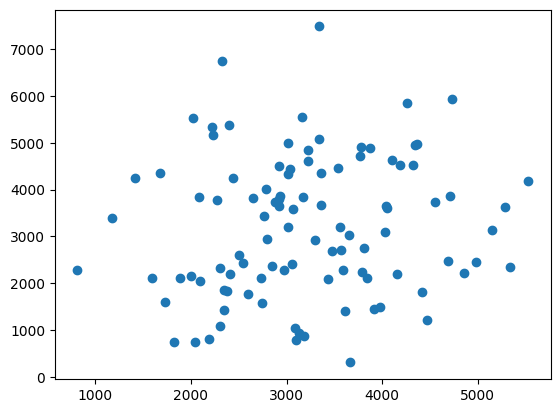

In [455]:
plt.scatter(tourist_sample_w[-1], excursionist_sample_w[-1]);

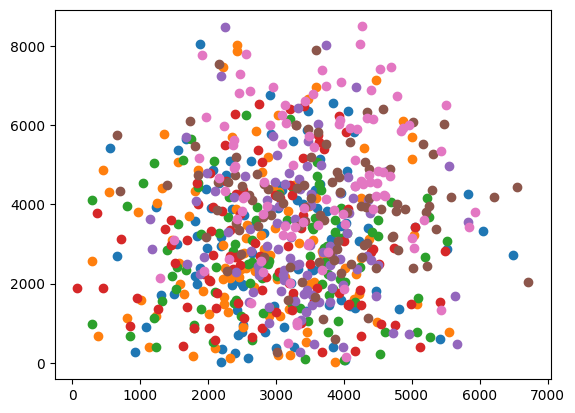

In [456]:
for w in range(7):
    plt.scatter(tourist_sample_w[w], excursionist_sample_w[w]);

In [457]:
tourist_sample_p = {}
excursionist_sample_p = {}
sample_size = 100

for p in meteo_dist.keys():
    stats = tourist_presences_stats[-1, p]
    tourist_sample_p[p] = truncnorm.rvs(-stats['mean'] / stats['std'], 10, loc=stats['mean'], scale=stats['std'], size=sample_size)
    stats = excursionist_presences_stats[-1, p]
    excursionist_sample_p[p] = truncnorm.rvs(-stats['mean'] / stats['std'], 10, loc=stats['mean'], scale=stats['std'], size=sample_size)

In [460]:
meteo_dist.keys()

dict_keys(['Normale', 'Caldo', 'Freddo'])

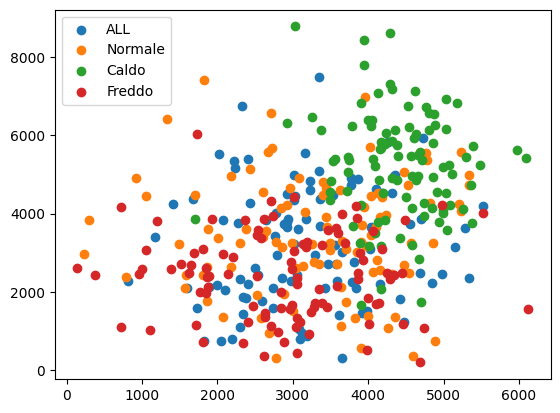

In [461]:
plt.scatter(tourist_sample_w[-1], excursionist_sample_w[-1], label='ALL')
for p in meteo_dist.keys():
    plt.scatter(tourist_sample_p[p], excursionist_sample_p[p], label=p)
    plt.legend()

In [462]:
meteo_dist

{'Normale': 0.4807692307692308, 'Caldo': 0.2692307692307692, 'Freddo': 0.25}